In [1]:
import pandas as pd
import numpy as np

import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.figure_factory as ff
import seaborn as sns
import matplotlib.pyplot as plt


from plotly.offline import plot, iplot, init_notebook_mode
init_notebook_mode(connected=True)

import re

In [2]:
df = pd.read_csv('Top 1000 IMDB movies.csv', index_col=[0])

In [3]:
df.head()

,Movie Name,Release Year,Watch Time,Movie Rating,Metascore,Votes,Gross,Genre,Directors,Stars
Ranking,,,,,,,,,,
1,The Shawshank Redemption,1994,142,9.3,81.0,"2,612,987",$28.34M,Drama,Frank Darabont,"Tim Robbins, Morgan Freeman, Bob Gunton, Willi..."
2,The Godfather,1972,175,9.2,100.0,"1,808,435",$134.97M,"Crime, Drama",Francis Ford Coppola,"Marlon Brando, Al Pacino, James Caan, Diane Ke..."
3,The Dark Knight,2008,152,9.0,84.0,"2,585,038",$534.86M,"Action, Crime, Drama",Christopher Nolan,"Christian Bale, Heath Ledger, Aaron Eckhart, M..."
4,The Lord of the Rings: The Return of the King,2003,201,9.0,94.0,"1,793,421",$377.85M,"Action, Adventure, Drama",Peter Jackson,"Elijah Wood, Viggo Mortensen, Ian McKellen, Or..."
5,Schindler's List,1993,195,9.0,94.0,"1,327,956",$96.90M,"Biography, Drama, History",Steven Spielberg,"Liam Neeson, Ralph Fiennes, Ben Kingsley, Caro..."


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 1 to 1,000
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Movie Name    1000 non-null   object 
 1   Release Year  1000 non-null   int64  
 2   Watch Time    1000 non-null   int64  
 3   Movie Rating  1000 non-null   float64
 4   Metascore     836 non-null    float64
 5   Votes         1000 non-null   object 
 6   Gross         817 non-null    object 
 7   Genre         1000 non-null   object 
 8   Directors     1000 non-null   object 
 9   Stars         1000 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 85.9+ KB


In [5]:
#Converting Gross column from object to float type
df['Gross'] =df['Gross'].str.replace(r'[$M]','').astype('float')


<ipython-input-5-04d8eb66cdd5>:2: FutureWarning:

The default value of regex will change from True to False in a future version.



In [6]:
#Converting Release Year column from int to object type
# df['Release Year'] = df['Release Year'].astype('object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 1 to 1,000
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Movie Name    1000 non-null   object 
 1   Release Year  1000 non-null   int64  
 2   Watch Time    1000 non-null   int64  
 3   Movie Rating  1000 non-null   float64
 4   Metascore     836 non-null    float64
 5   Votes         1000 non-null   object 
 6   Gross         817 non-null    float64
 7   Genre         1000 non-null   object 
 8   Directors     1000 non-null   object 
 9   Stars         1000 non-null   object 
dtypes: float64(3), int64(2), object(5)
memory usage: 85.9+ KB


In [8]:
df.isnull().sum()

Movie Name        0
Release Year      0
Watch Time        0
Movie Rating      0
Metascore       164
Votes             0
Gross           183
Genre             0
Directors         0
Stars             0
dtype: int64

* There are null values in columns:
    * Metascore - replace null values with the mean value of Metascore column.
    * Gross - replace null value with the mean value of Gross column.

In [9]:
df['Metascore'] = df['Metascore'].replace(np.nan, np.mean(df['Metascore']))
df['Gross'] = df['Gross'].replace(np.nan, np.mean(df['Gross']))

In [10]:
df.isnull().sum()

Movie Name      0
Release Year    0
Watch Time      0
Movie Rating    0
Metascore       0
Votes           0
Gross           0
Genre           0
Directors       0
Stars           0
dtype: int64

# Movies count over the years

In [11]:
df['Release Year'].sort_values().unique()

array([1920, 1921, 1922, 1924, 1925, 1926, 1927, 1928, 1930, 1931, 1932,
       1933, 1934, 1935, 1936, 1937, 1938, 1939, 1940, 1941, 1942, 1943,
       1944, 1945, 1946, 1947, 1948, 1949, 1950, 1951, 1952, 1953, 1954,
       1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965,
       1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976,
       1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987,
       1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998,
       1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009,
       2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020,
       2021, 2022], dtype=int64)

In [12]:
fig = px.histogram(data_frame=df.sort_values(by='Release Year'), x='Release Year', 
                   color_discrete_sequence=['gold'], nbins=103)

fig.update_layout(font=dict(family='Lato', size=18, color='white'), 
                  title=dict(text='<b>Distributions of IMBD movies from<b> 1920 - now',
                           font=dict(size=30), x=.5), bargap=0.2,
                  paper_bgcolor= 'black', plot_bgcolor='black',
                 xaxis = dict(title='Year of release', showgrid=False),
                 yaxis=dict(showgrid=False))

* The Distribution is left skewed.
* Year 2004 and 2014 has most number of top movies ie 32 each.
* Apart from this there is some peaks of top movies in 1962, 1993, and 2001.
* After 2019 the number of movies top films have decreased because of the rise in Covid-19 pandemic. 

# Genres

In [13]:
# Splitting genres 
gensplt = df['Genre'].str.split(', ', n=-1, expand= True)
gensplt.columns = ['G1','G2','G3']
gensplt.head()

,G1,G2,G3
Ranking,,,
1,Drama,None,None
2,Crime,Drama,None
3,Action,Crime,Drama
4,Action,Adventure,Drama
5,Biography,Drama,History


In [14]:
# Appending genres into one string
genone = gensplt['G1'].append(gensplt['G2'])
genone= genone.append(gensplt['G3'])
genone = genone.dropna(axis=0, how='any')
genone = genone.str.lstrip()
genone

<ipython-input-14-709abea9dccb>:2: FutureWarning:

The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-14-709abea9dccb>:3: FutureWarning:

The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



Ranking
1          Drama
2          Crime
3         Action
4         Action
5      Biography
         ...    
993      Romance
996      Romance
997          War
998       Family
999     Thriller
Length: 2540, dtype: object

In [15]:
# Creating a dataframe of genre string
dfgenre = pd.DataFrame(genone)
dfgenre.columns =['G']

In [16]:
dfgenre['G'].sort_values().unique()


array(['Action', 'Adventure', 'Animation', 'Biography', 'Comedy', 'Crime',
       'Drama', 'Family', 'Fantasy', 'Film-Noir', 'History', 'Horror',
       'Music', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Sport',
       'Thriller', 'War', 'Western'], dtype=object)

In [17]:
# Count of each genre 
dfgenre['G'].value_counts()

Drama        728
Comedy       237
Crime        209
Action       200
Adventure    191
Thriller     135
Romance      127
Biography    107
Mystery       99
Animation     83
Sci-Fi        68
Fantasy       62
History       50
Family        50
War           49
Horror        36
Music         36
Film-Noir     22
Western       19
Musical       16
Sport         16
Name: G, dtype: int64

In [18]:
fig = px.histogram(data_frame =dfgenre.value_counts(),x=dfgenre['G'], color_discrete_sequence=['gold'])

fig.update_layout(font=dict(family='Lato', size=18, color='white'), 
                  title=dict(text='<b>Genre Count<b>',
                           font=dict(size=30), x=.5), bargap=0.2,
                  paper_bgcolor= 'black', plot_bgcolor='black',
                 xaxis = dict(title='Genres', showgrid=False),
                 yaxis=dict(title='Count',showgrid=False))
fig.update_xaxes(tickangle=30)
fig.show()

* Drama is the most popular genre in top movies having the count of 728.
* Musical and Sport is least popular genre in top movies having the count of 16 each.

In [19]:
def bar_plot(column_name, data_frame =df, tribe='value_counts', by=None, limit=None, **kwargs):
    
    if type(column_name)!= str or column_name not in data_frame.columns:
        raise ValueError('Incorrect name or type')
        
    if type(limit)!= int:
        raise ValueError(f'expected int type, got {type(limit)}')
        
    if tribe == 'sort':
        
        if not by or by not in data_frame.columns:
            raise ValueError('by parameter must be a column from dataframe!')
        data = data_frame.sort_values(by=by, ascending=False).head(limit)
        y=data[by].values
        x=data[column_name]
        title=by
        
    elif tribe == 'value_counts':
        data = data_frame[column_name].value_counts().head(limit)
        x=data.index
        y=data.values
        title=column_name
            
    fig = px.bar(x=x, y=y, color_discrete_sequence=['gold'])
        
    fig.update_layout(font=dict(family='Lato', size=18, color='white'),
                        title=dict(text=f'<b>IMDB movies - {title}',
                                  font = dict(size=30), x=0.5),
                        paper_bgcolor='black', plot_bgcolor='black',
                        xaxis=dict(title=f'{title}', showgrid=False),
                        yaxis=dict(title=f'count', showgrid=False))
    fig.update_xaxes(tickangle=30)
    fig.show()
        
        

# Top Grossing Movies

In [20]:
# Top 10 highest Grossing movies
bar_plot("Movie Name", tribe='sort', by='Gross', limit=10)

* Star Wars Episode VII- The Force Awakens is the most grossing movie and has collected of $936.66M.


# Movies with high Watch Time 

In [21]:
# Top 10 movies with high watching time.
bar_plot('Movie Name', tribe='sort', by='Watch Time', limit=10)

* Gangs of Wasseypur is the movie with highest watch time of 321 mins.

# Movies according to Ratings

In [22]:
# Top 10 movies According to the ratings.
bar_plot('Movie Name', tribe='sort', by='Movie Rating', limit=10)

* The Shawshank Redemption is the movie with highest rating oof 9.3 .

# Top Directors

In [23]:
#Top 20 Directors with top movies
bar_plot('Directors', limit =20)

* Steven Spielberg, Alfred Hitchcock is the most sucessful director with count of 13 movies each in top 1000 movies.

# Stars

In [24]:
starsplt = df['Stars'].str.split(', ', n=-1, expand= True)
starsplt.columns = ['S1','S2','S3','S4']
starsplt.head()

,S1,S2,S3,S4
Ranking,,,,
1,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler
2,Marlon Brando,Al Pacino,James Caan,Diane Keaton
3,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine
4,Elijah Wood,Viggo Mortensen,Ian McKellen,Orlando Bloom
5,Liam Neeson,Ralph Fiennes,Ben Kingsley,Caroline Goodall


In [25]:
starone = starsplt['S1'].append(starsplt['S2'])
starone = starone.append(starsplt['S3'])
starone = starone.append(starsplt['S4'])
starone.dropna(axis=0, how='any')
starone

<ipython-input-25-5f417a68e3d3>:1: FutureWarning:

The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-25-5f417a68e3d3>:2: FutureWarning:

The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-25-5f417a68e3d3>:3: FutureWarning:

The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



Ranking
1           Tim Robbins
2         Marlon Brando
3        Christian Bale
4           Elijah Wood
5           Liam Neeson
              ...      
996      Walter Hampden
997          Donna Reed
998          Roy Atwell
999      Godfrey Tearle
1,000     Henry Travers
Length: 4000, dtype: object

In [26]:
dfstar = pd.DataFrame(starone)
dfstar.columns =['Stars']
dfstar

,Stars
Ranking,
1,Tim Robbins
2,Marlon Brando
3,Christian Bale
4,Elijah Wood
5,Liam Neeson
...,...
996,Walter Hampden
997,Donna Reed
998,Roy Atwell


In [27]:
bar_plot('Stars', data_frame=dfstar, limit=20)

* Robert De Niro is the most succesfull actors starring in 16 movies in the Top 1000 IMDB movies.

C:\Users\yjynj\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<Figure size 1440x1440 with 0 Axes>

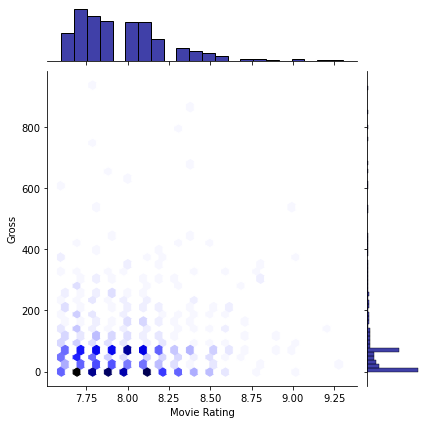

In [28]:
plt.figure(figsize=(20,20))
sns.jointplot("Movie Rating", "Gross", data=df, kind='hex', color='DarkBlue')